# Model de régression non linaire .


- Machine learning with scipy, scikit learn, ....
- la fonction cout
- le model
- le gradiant
- la descent de gradiant 
- le learning rate (taux d'aprentissage)
- evaluayion du model (coefficient de détermination)


In [176]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

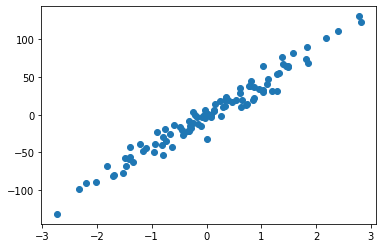

In [205]:
x, y = make_regression(n_samples=100, n_features=1, noise = 10)
y = y.reshape(y.shape[0],1)
y = y + abs(y/2)
plt.scatter(x, y)

In [206]:
print(x.shape)
print(y.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)
(100, 1)


In [207]:
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))
print(X.shape)

(100, 3)


In [180]:
np.random.seed(0)
theta = np.random.rand(3,1)
theta

array([[0.5488135 ],
       [0.71518937],
       [0.60276338]])

In [181]:
def model(X, theta):
    return X.dot(theta)

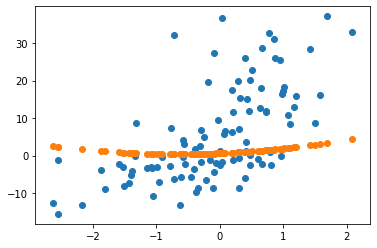

In [182]:
Model = model(X, theta)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], Model)

In [183]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [184]:
cost_function(X, y, theta)

85.75607358504027

In [185]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [186]:
 def gradient_descent(X, y, theta, learning_rate, n_iteration):
        cost_history = np.zeros(n_iteration)
        for i in range(0, n_iteration):
            cost_history[i] = cost_function(X, y, theta)
            theta = theta - learning_rate * grad(X, y, theta)
        return theta, cost_history

In [187]:
test_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iteration=1000)


In [188]:
print('x shape',x.shape)
print('y shape',y.shape)
print('X shape',x.shape)

x shape (100, 1)
y shape (100, 1)
X shape (100, 1)


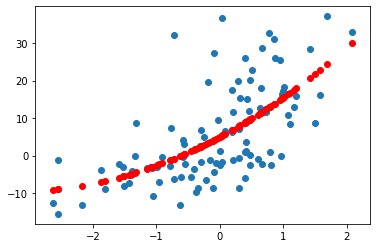

In [189]:
prediction = model(X, test_final)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], prediction, c='r')

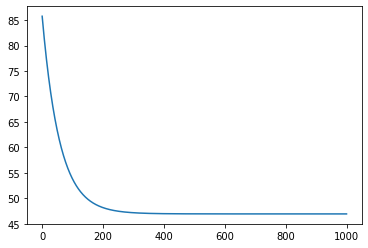

In [190]:
plt.plot(range(1000), cost_history)

In [191]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [192]:
coef_determination(y, prediction)

0.4098830902485664

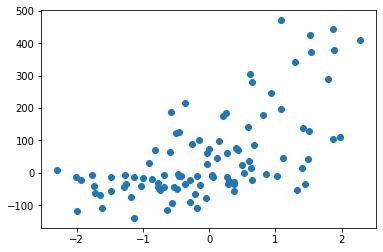

In [193]:
x, y = make_regression(n_samples=100, n_features=2, noise = 10)
y = y.reshape(y.shape[0],1)
y = y + abs(y/2)
plt.scatter(x[:,0], y)

In [194]:
print(x.shape)
print(y.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 2)
(100, 1)
(100, 1)


In [195]:
X = np.hstack((x, np.ones((x.shape[0],1))))
print(X.shape)

(100, 3)


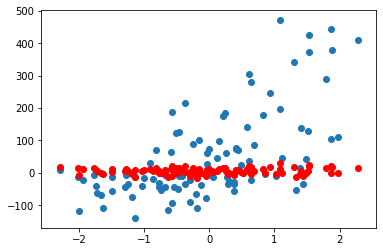

In [196]:
prediction = model(X, test_final)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], prediction, c='r')

In [197]:
cost_function(X, y, theta)

10052.381628899548

In [198]:
test_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.1, n_iteration=1000)


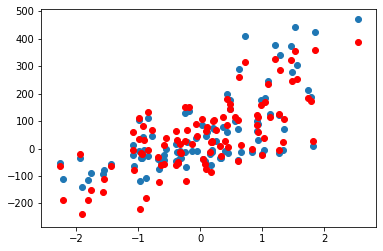

In [199]:
prediction = model(X, test_final)
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], prediction, c='r')

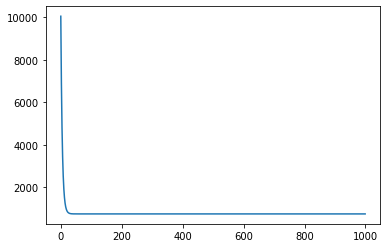

In [200]:
plt.plot(range(1000), cost_history)

In [201]:
coef_determination(y, prediction)

0.9173437170968252

In [202]:
import plotly.graph_objects as go

In [203]:
print(x.shape)
print(y.shape)

(100, 2)
(100, 1)


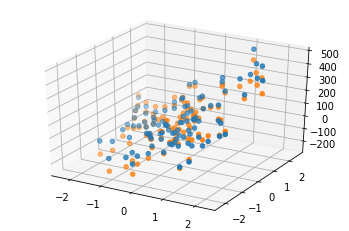

In [204]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], prediction)